In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

In [11]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)


2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
prcip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcip_data_df = pd.DataFrame(prcip_data)
prcip_data_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [13]:
# Sort the dataframe by date
sort_prcip_data_df = prcip_data_df.sort_values(by=["date"])
sort_prcip_data_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


Text(0.5, 0, 'Date')

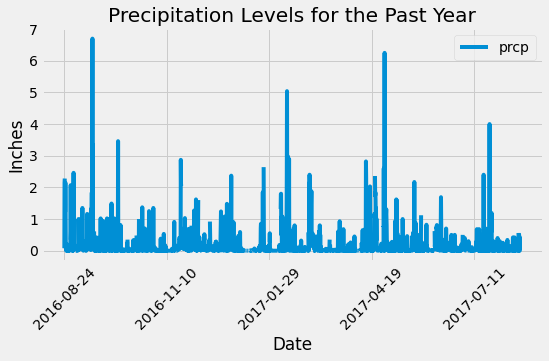

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_prcip_data_df.set_index('date', inplace=True)
ax = sort_prcip_data_df.plot(rot=45,figsize=(8,4));
ax.set_title("Precipitation Levels for the Past Year")
ax.set_ylabel("Inches")
ax.set_xlabel("Date")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_prcip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.id)).first()
print(f'There are {total_stations[0]} stations in total.')

There are 9 stations in total.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
print(f'The lowest temperature for station USC00519281 is {lowest_temp[0]}.')
print(f'The average temperature for station USC00519281 is {average_temp[0]}.')
print(f'The highest temperature for station USC00519281 is {highest_temp[0]}.')

The lowest temperature for station USC00519281 is 54.0.
The average temperature for station USC00519281 is 71.66378066378067.
The highest temperature for station USC00519281 is 85.0.


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > one_year_ago).all()
most_active_station[:12]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0)]

In [20]:
most_active_station= pd.DataFrame(USC00519281_data)
most_active_station.plot(kind="hist",bins=12);

NameError: name 'USC00519281_data' is not defined

# Close session

In [ ]:
# Close Session
session.close()